In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import train, RNN, FittedRNN, OneDimEquivalent
import plotter as pt

from pydoc import help

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [6]:
help(pt)

Help on module plotter:

NAME
    plotter

FUNCTIONS
    plot_input_range(model, f_in_vec, in_params, num_repeat=10, alpha=0, figsize=(8, 6), cmap_str='turbo', background='grey', linewidth=2.0)
    
    plot_network_in_ax1_ax2(model, f_in_vec, in_params, ax1_str, ax2_str, num_repeat=10, figsize=(8, 6), alpha=0, background='grey', linewidth=2.5)
    
    plot_neuron_states(model, u, y, figsize=(8, 6), alpha=0.5, apply_activation=False, plot_by='', linewidth=1.5)
        The weights are normalized by their max absolute value and used to control
        the alpha parameter of each line.
        
        Param:
        plot_by
            'weight' - Colors neurons with positive weights blue and negative red
            'adj_weight' - Each neuron is multiplied by the sign of its weight.
    
    plot_scatter(x, y, xlabel='', ylabel='', figsize=(5, 5))
    
    visCov(model, figsize=(8, 8), fontsize=20, cmap='bwr', flip_m_n=False)
        Visualize the modified triangular covariance matrix o

# Standard learning

In [7]:
p_dataset = ParametricDataset(32000)
train_dataloader = DataLoader(p_dataset, batch_size=32)

model = RNN(rank=2)
loss_hist = train(train_dataloader, model, device)


loss: 0.298132  [   32/32000]
loss: 0.159435  [ 3232/32000]


KeyboardInterrupt: 

# Curriculum learning

In [11]:
pause_lengths = np.arange(25, 51, 5, dtype=np.intc)
model_rank2= RNN(rank=2)

loss_hist = []

print(pause_lengths)

print("Rank 2 training")
for pl in pause_lengths:
    print("Pause length: ", pl)
    p_data = ParametricDataset(8000, pause=pl)
    train_dataloader = DataLoader(p_data, batch_size=32)
    loss_hist += train(train_dataloader, model_rank2, device,T=5)

[25 30 35 40 45 50]
Rank 2 training
Pause length:  25
loss: 0.175344  [   32/ 8000]
loss: 0.139350  [ 3232/ 8000]
loss: 0.069807  [ 6432/ 8000]
Pause length:  30
loss: 0.128649  [   32/ 8000]
loss: 0.063828  [ 3232/ 8000]
loss: 0.112113  [ 6432/ 8000]
Pause length:  35
loss: 0.171025  [   32/ 8000]
loss: 0.136253  [ 3232/ 8000]
loss: 0.143564  [ 6432/ 8000]
Pause length:  40
loss: 0.092948  [   32/ 8000]
loss: 0.124250  [ 3232/ 8000]
loss: 0.112419  [ 6432/ 8000]
Pause length:  45
loss: 0.102737  [   32/ 8000]
loss: 0.124527  [ 3232/ 8000]
loss: 0.132078  [ 6432/ 8000]
Pause length:  50
loss: 0.086406  [   32/ 8000]
loss: 0.105878  [ 3232/ 8000]
loss: 0.105654  [ 6432/ 8000]


# Loss Plot

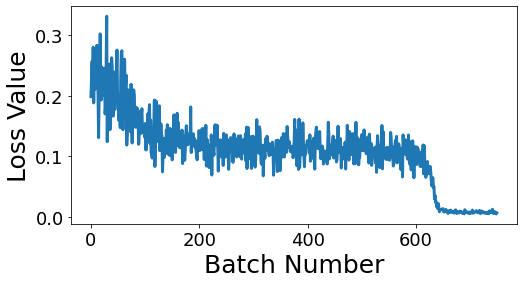

In [10]:
loss_hist = np.array(loss_hist)

SMALL_SIZE = 18
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.figure(figsize=(8, 4))
plt.ylabel("Loss Value")
plt.xlabel("Batch Number")
plt.yscale('linear')
plt.plot(loss_hist, linewidth=3)

In [4]:
SMALL_SIZE = 18
MEDIUM_SIZE = 28
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

m = model.m.detach().numpy().squeeze()
n = model.n.detach().numpy().squeeze()
wi = model.wi.detach().numpy().squeeze()
w = model.wi.detach().numpy().squeeze()
    
# pt.plot_scatter(m, w, xlabel="$m_1$", ylabel="$w$")
    
# pt.plot_scatter(m, n, xlabel="$m$", ylabel="$n$")

# pt.plot_scatter(n, wi, xlabel="$n$", ylabel="$I$")

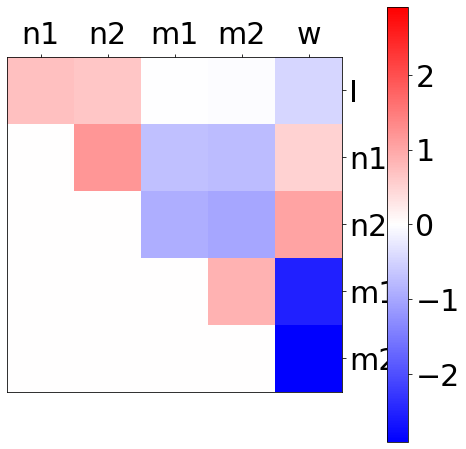

In [5]:
SMALL_SIZE = 30
MEDIUM_SIZE = 28
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

pt.visCov(model, flip_m_n=False)

[(10, 10), (10, 14), (10, 18), (10, 22), (10, 26), (10, 30), (10, 34)]
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 14)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 18)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(10, 22)
(1

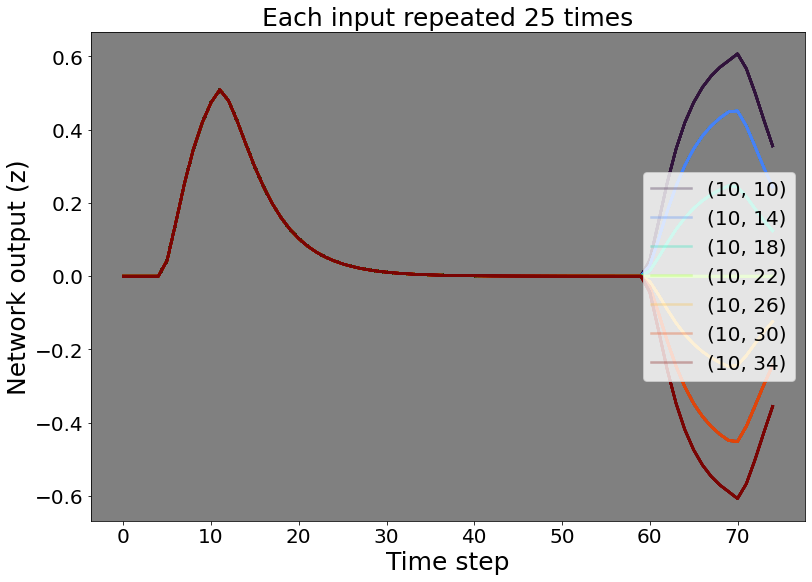

In [6]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)

in_params = [(10, 10), (10, 14), (10, 18), (10, 22), (10, 26), (10, 30), (10, 34)]
print(in_params)
print(in_params[0])

pt.plot_input_range(model, 
                parametric, 
                in_params,
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

ValueError: shapes (128,2) and (128,2) not aligned: 2 (dim 1) != 128 (dim 0)

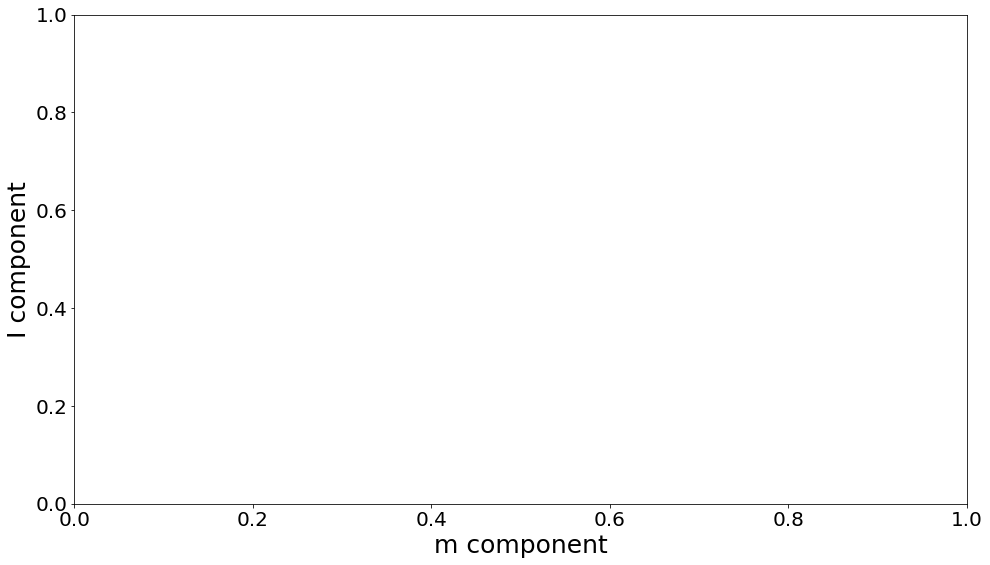

In [7]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)

pt.plot_network_in_m_i(model, 
                    single_decision, 
                    (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]), 
                    num_repeat=10,
                    alpha=0.3,
                    figsize=(16,9))

In [22]:
fit_model = FittedRNN(model)

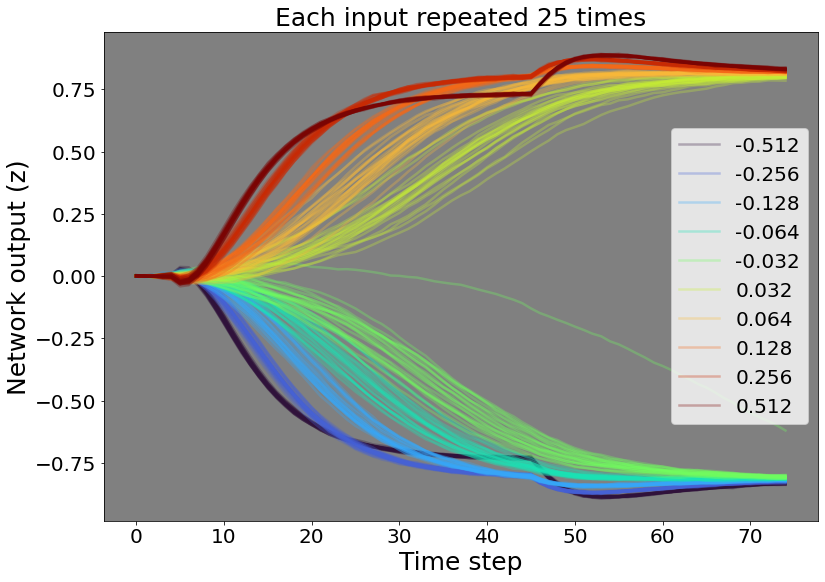

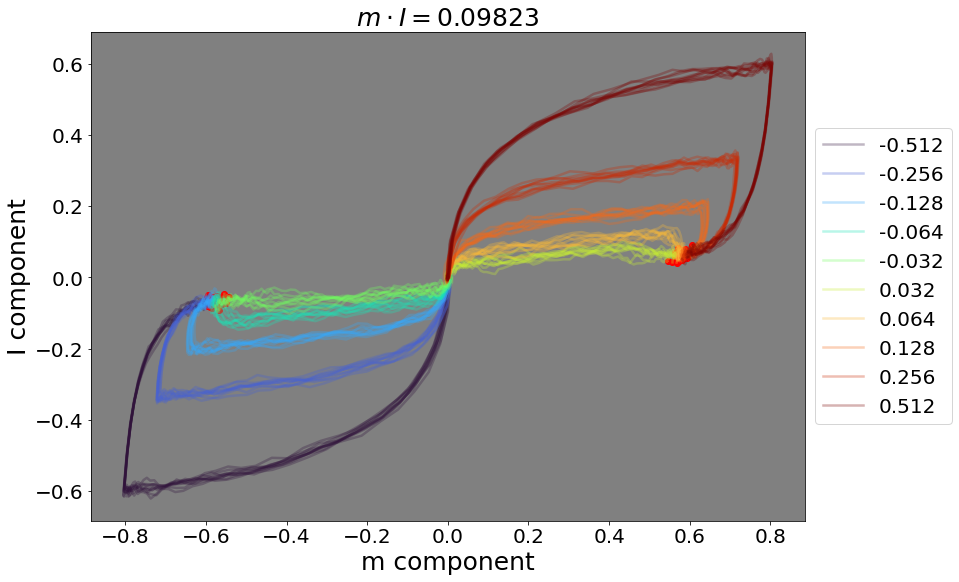

In [23]:
pt.plot_input_range(fit_model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

pt.plot_network_in_m_i(fit_model, 
                    single_decision, 
                    (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]), 
                    num_repeat=10,
                    alpha=0.3,
                    figsize=(16,9))

In [24]:
dim_model = OneDimEquivalent(model)

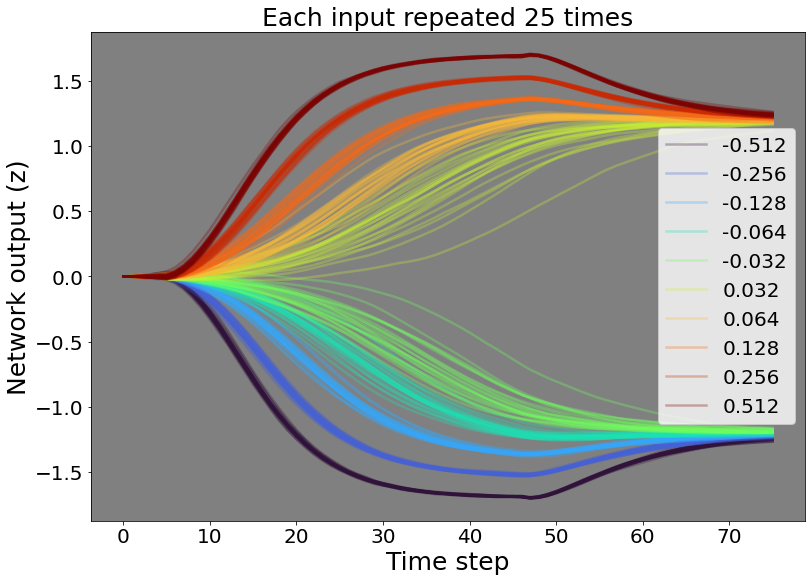

In [25]:
pt.plot_input_range(dim_model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)